In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

In [17]:
warnings.filterwarnings('ignore')

In [18]:
pe = [[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]]]
for i in range(10):
    with open('partialestimates'+str(i)+'.csv') as f:
        pe[i] = pe[i] + [[float(x) for x in line.split(',')] for line in f] 
    pe[i] = pe[i][1:]

### Plot an evolution for every value of N

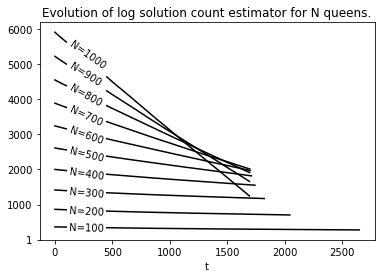

In [35]:
# Plot first evolution for every value of N
fig, ax = plt.subplots()
NUM_UNKNOWN = len(pe)
GAP = 350
START = 100
for l in range(NUM_UNKNOWN):
    T = len(pe[l][0])
    x, y   = np.arange(1, T+1), pe[l][0]
    x1, x2 = x[:START], x[START+GAP:]
    y1, y2 = y[:START], y[START+GAP:]
    
    angle = np.arctan((y[START+GAP]-y[START]) / (x[START+GAP]-x[START])) * 180 / (2 * np.pi)
    ax.annotate("N={0:d}".format((l+1) * 100),
      xy     = (      x[START], y[START]),
      xytext = (1.2 * x[START], y[START] - 100),
      color  = 'black',
      rotation = angle,
      rotation_mode='anchor'
    )
    
    plt.plot(x1,y1,color='black')
    plt.plot(x2,y2,color='black')
ax.set_xlabel("t")
newylabels = ['0','1']+[str(y)[:4] for y in ax.get_yticks()[2:]]
ax.set_yticklabels(newylabels)
plt.title("Evolution of log solution count estimator for N queens.")
plt.show()

### Plot all evolutions for N=1000

In [23]:
mpe = np.array(pe[-1])
mpe.shape

(64, 1691)

In [24]:
# calculate error bars
error = np.std(mpe, axis=0)
means = np.mean(mpe, axis=0)
len(means)

1691

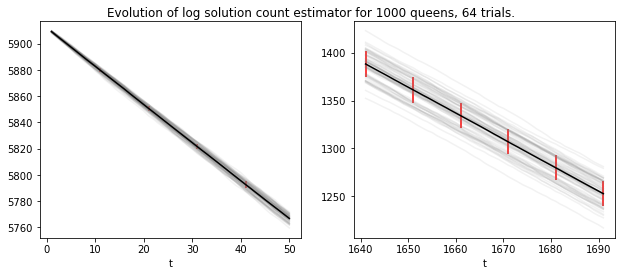

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(9)
K = len(mpe)
FROM = -50
offset = -1
for k in range(K):
    T = len(mpe[k])
    x, y   = np.arange(1, T+1), mpe[k]
    
    # Subplot 1
    ax1.plot(x[:-FROM],y[:-FROM],color='grey', alpha=0.1)

    
    # Subplot 2
    ax2.plot(x[FROM+offset:],y[FROM+offset:],color='grey', alpha=0.1)

# Plot means and errors
x, y = np.arange(1, len(means)+1), means
ax1.plot(x[:-FROM],y[:-FROM],color='black')
ax2.plot(x[FROM+offset:],y[FROM+offset:],color='black')
ax1.errorbar(x[:-FROM],y[:-FROM], yerr =error[:-FROM], xerr=None, fmt='none', color='red', errorevery=10)
ax2.errorbar(x[FROM+offset:],y[FROM+offset:], yerr =error[FROM+offset:], xerr=None, fmt='none', color='red', errorevery=10)
    
# Annotate errors
ax1.set_xlabel("t")
ax2.set_xlabel("t")

newylabels1 = [str(y)[:4] for y in ax1.get_yticks()]
ax1.set_yticklabels(newylabels1)
newylabels2 = [str(y)[:4] for y in ax2.get_yticks()]
ax2.set_yticklabels(newylabels2)
fig.tight_layout(pad=2.0)
fig.suptitle("Evolution of log solution count estimator for 1000 queens, {0:d} trials.".format(len(mpe)))
plt.show()

### Plot errors for all values of N, all values of T

In [47]:
errors_all = [np.std(pe[i], axis=0) for i in range(10)]
means_all = [np.mean(pe[i], axis=0) for i in range(10)]

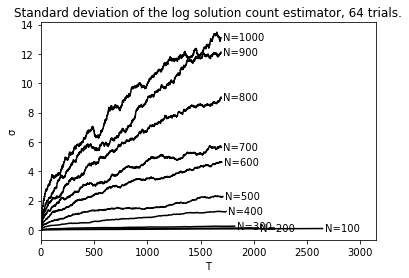

In [42]:
# Plot first evolution for every value of N
fig, ax = plt.subplots()
NUM_UNKNOWN = len(pe)
for l in range(NUM_UNKNOWN):
    T = len(errors_all[l])
    x, y   = np.arange(1, T+1), errors_all[l]
    x1, x2 = x[:START], x[START+GAP:]
    y1, y2 = y[:START], y[START+GAP:]
    angle = np.arctan((y2[0]-y1[-1]) / (x2[0]-x1[-1])) * 180
    ax.annotate("N={0:d}".format((l+1) * 100),
      xy     = (      x[-1], y[-1]),
      xytext = (x[-1]+20, y[-1]-0.2),
      color  = 'black',
      rotation = 0,
      rotation_mode='anchor')
    
    plt.plot(x,y,color='black')
ax.set_ylabel("σ")
ax.set_xlabel("T")
plt.xlim([0,500+max([len(errors) for errors in errors_all])])
plt.title("Standard deviation of the log solution count estimator, {0:d} trials.".format(len(mpe)))
plt.show()

In [52]:
print("""After T iterations, the means and standard deviations
of the log-number of solutions""")
for i, errors in enumerate(errors_all):
    print("{0:d} & {1:.3f} & {2:.3f}".format((i+1)*100, means_all[i][-1],errors[-1]))

After T iterations, the means and standard deviations
of the log-number of solutions
100 & 276.299 & 0.097
200 & 703.048 & 0.137
300 & 1170.833 & 0.258
400 & 1551.526 & 1.253
500 & 1818.873 & 2.277
600 & 1970.830 & 4.631
700 & 2003.705 & 5.632
800 & 1905.808 & 9.037
900 & 1664.776 & 12.117
1000 & 1252.723 & 13.110
